## SQL queries

In [1]:
!pip install pandasql
! pip install sqlalchemy
! pip install PyMySQL

In [2]:
import pandas as pd
import pymysql
from sqlalchemy import create_engine
from pandasql import sqldf
import getpass  
password = getpass.getpass() 

········


In [3]:
df = pd.read_csv("/Users/clark/Desktop/ironhack/final-project/files/Cleaned dataset.csv", delimiter=",")
df

,Property ID,Neighborhood,Average Daily Rate,Annual Revenue,Occupancy Rate,Bedrooms,Bathrooms,Airbnb Superhost,Minimum Stay,Latitude,Longitude,Pets Allowed,Has Pool,Has Air Conditioning,Has Parking,Has Terrace,Seasonality
0,13969432,"Sant Pere, Santa Caterina i la Ribera",109.19,437.0,1.000,1,1.0,False,32.0,41.382480,2.182920,False,False,True,False,False,0.76
1,13979120,la Barceloneta,96.00,96.0,1.000,1,1.0,False,32.0,41.378850,2.190840,True,False,True,False,False,0.60
2,13986464,la Nova Esquerra de l'Eixample,184.95,19605.0,0.791,3,1.0,False,3.0,41.382530,2.157520,False,False,True,False,False,0.73
3,13992866,Sant Antoni,84.05,420.0,1.000,3,1.0,True,32.0,41.378020,2.160660,False,False,True,True,True,0.67
4,14004632,la Dreta de l'Eixample,320.97,109450.0,0.942,2,2.0,False,2.0,41.392620,2.174230,False,False,True,False,False,0.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15830,6715955,el Poble Sec,0.00,0.0,0.481,2,1.0,False,0.0,41.373940,2.164641,False,False,True,False,False,0.49
15831,6724259,la Sagrada Família,0.00,0.0,0.769,3,2.0,False,1.0,41.404500,2.172212,False,False,True,False,False,0.72
15832,6726949,la Vila de Gràcia,0.00,0.0,0.775,2,1.0,False,1.0,41.408594,2.159238,False,False,True,False,False,0.64
15833,6776396,Sant Gervasi - Galvany,0.00,0.0,0.000,2,3.0,False,0.0,41.398920,2.146227,False,False,True,False,False,0.51


In [11]:
# Wich neighborhood has the highest average annual revenue?

query = """
    SELECT Neighborhood, AVG(`Annual Revenue`) AS `Total Annual Revenue`
    FROM df
    GROUP BY Neighborhood 
    ORDER BY `Total Annual Revenue` DESC
    LIMIT 1
"""

result = sqldf(query)
print(result, "€")

             Neighborhood  Total Annual Revenue
0  la Dreta de l'Eixample          47450.365443 €


In [14]:
# Which neighborhood has the property with the highest annual revenue?

query1 = """
    SELECT Neighborhood, "Annual Revenue"
    FROM df 
    WHERE "Annual Revenue" = (SELECT MAX("Annual Revenue") FROM df)
"""

result = sqldf(query1)
print(result, "€")

             Neighborhood  Annual Revenue
0  la Dreta de l'Eixample        602386.0 €


In [21]:
# What features does the property with the highest revenue have?

query2 = """
    SELECT Neighborhood, "Annual Revenue", "Average Daily Rate", Bedrooms, "Pets Allowed", "Has Pool", "Has Air Conditioning", "Has Parking", "Has Terrace", "Airbnb Superhost"
    FROM df 
    WHERE "Annual Revenue" = (SELECT MAX("Annual Revenue") FROM df)
"""

result = sqldf(query2)
print(result)

             Neighborhood  Annual Revenue  Average Daily Rate  Bedrooms  \
0  la Dreta de l'Eixample        602386.0             1900.27         9   

   Pets Allowed  Has Pool  Has Air Conditioning  Has Parking  Has Terrace  \
0             0         0                     1            1            0   

   Airbnb Superhost  
0                 0  


In [25]:
# How many neighborhoods are they in Barcelona?

query3 = """
    SELECT COUNT(DISTINCT Neighborhood) AS "Total Number of Neighborhoods"
    FROM df 
"""

result = sqldf(query3)
print(result)

   Total Number of Neighborhoods
0                             68


In [26]:
# How many properties did we analyse?

query3 = """
    SELECT COUNT(DISTINCT "Property ID") AS "Total Number of Properties"
    FROM df 
"""

result = sqldf(query3)
print(result)

   Total Number of Properties
0                       15835


## Jupyter Notebook

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Which neighborhoods have the highest average annual revenue?

neighborhood_avg_revenue = df.groupby('Neighborhood')['Annual Revenue'].mean().sort_values(ascending=False)
print("Neighborhoods with highest average annual revenue:")
print(neighborhood_avg_revenue.head())

Neighborhoods with highest average annual revenue:
Neighborhood
la Dreta de l'Eixample             47450.365443
Sant Antoni                        36296.868456
la Sagrada Família                 34923.751423
l'Antiga Esquerra de l'Eixample    33504.862999
el Fort Pienc                      32682.984270
Name: Annual Revenue, dtype: float64


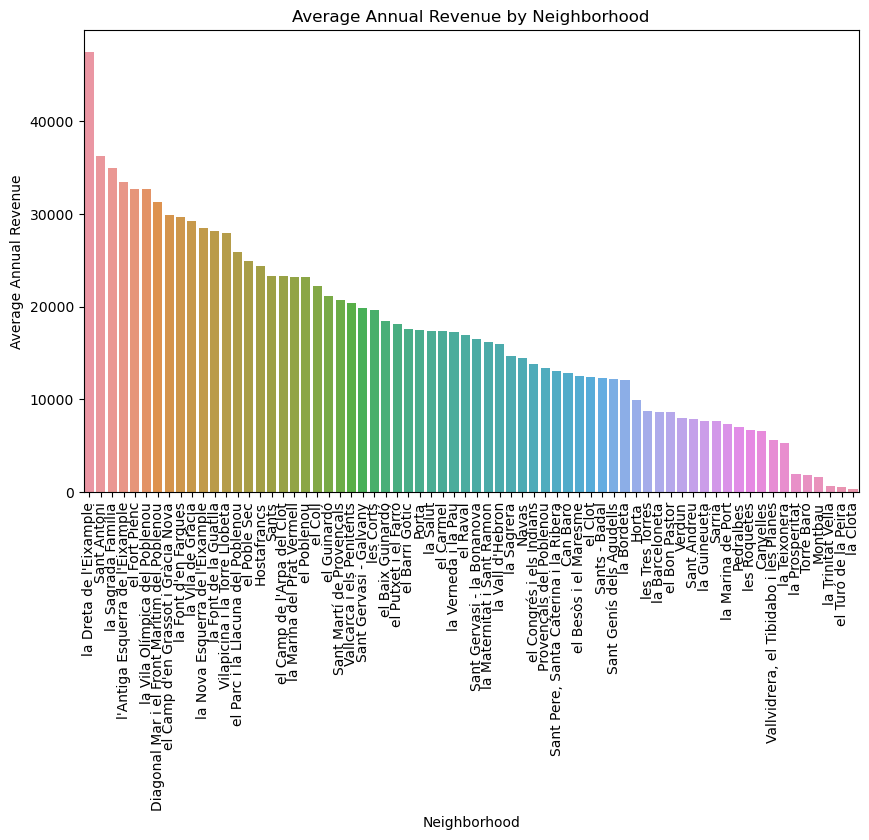

In [32]:
# Plotting average annual revenue across different neighborhoods

plt.figure(figsize=(10, 6))
sns.barplot(x=neighborhood_avg_revenue.index, y=neighborhood_avg_revenue.values)
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Average Annual Revenue')
plt.title('Average Annual Revenue by Neighborhood')
plt.show()


In [35]:
# Are there neighborhoods with high demand but lower competition?

# Add a new column for occupancy-to-property ratio
df['Occupancy_to_Property_Ratio'] = df['Occupancy Rate'] / (df.groupby('Neighborhood')['Property ID'].transform('count'))

# Sort neighborhoods based on the occupancy-to-property ratio
neighborhood_demand = df.groupby('Neighborhood')['Occupancy_to_Property_Ratio'].mean().sort_values(ascending=False)
print("Neighborhoods with high demand but lower competition:")
print(neighborhood_demand.head())

Neighborhoods with high demand but lower competition:
Neighborhood
Canyelles           0.210556
el Bon Pastor       0.141125
la Guineueta        0.125000
la Vall d'Hebron    0.118438
Montbau             0.087400
Name: Occupancy_to_Property_Ratio, dtype: float64


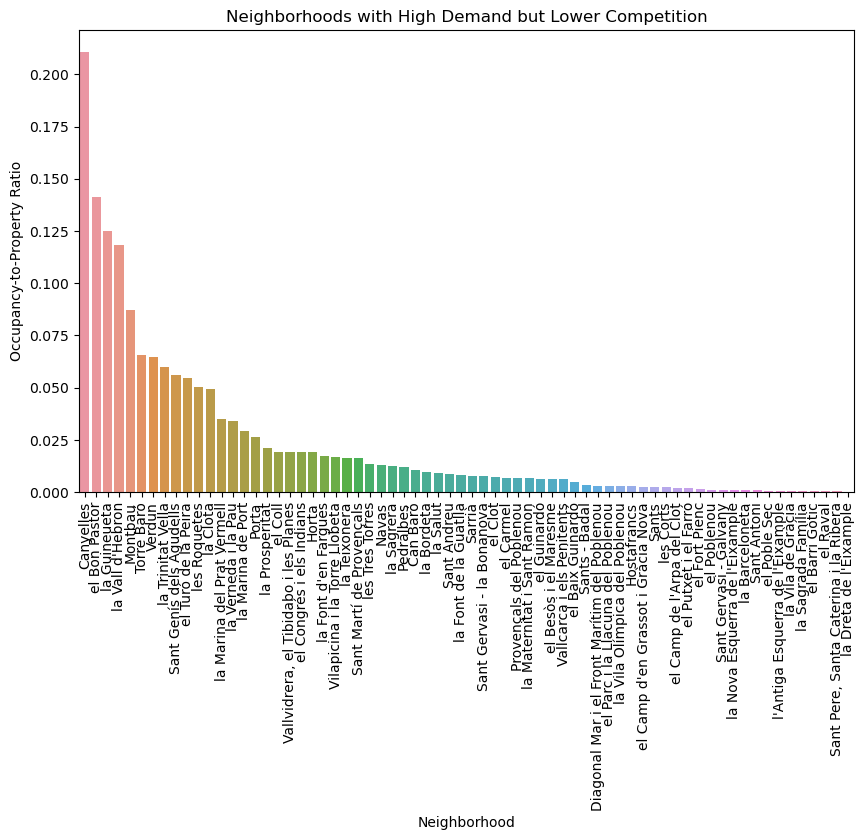

In [36]:
# Plotting demand-to-competition ratio across different neighborhoods

plt.figure(figsize=(10, 6))
sns.barplot(x=neighborhood_demand.index, y=neighborhood_demand.values)
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Occupancy-to-Property Ratio')
plt.title('Neighborhoods with High Demand but Lower Competition')
plt.show()

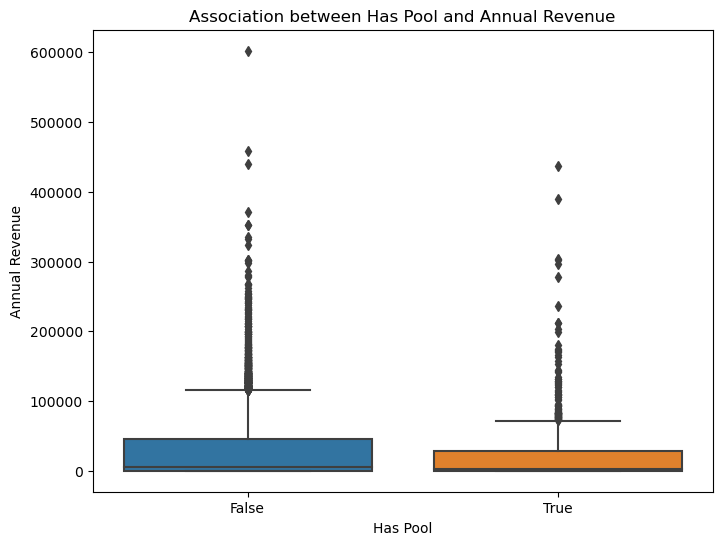

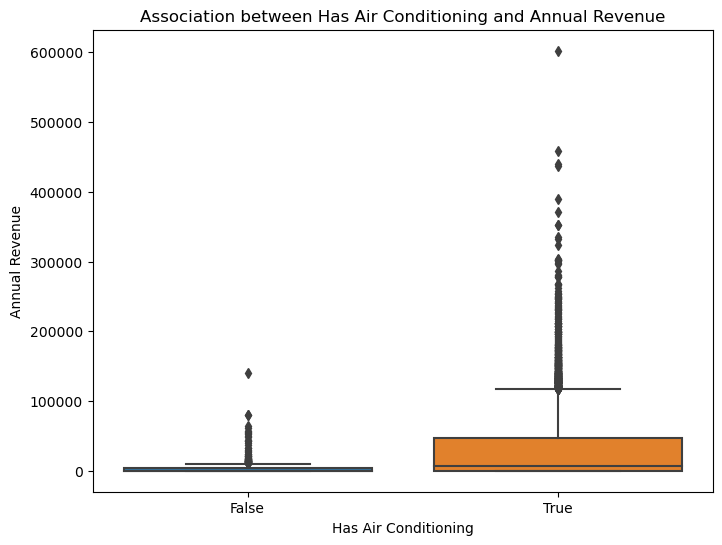

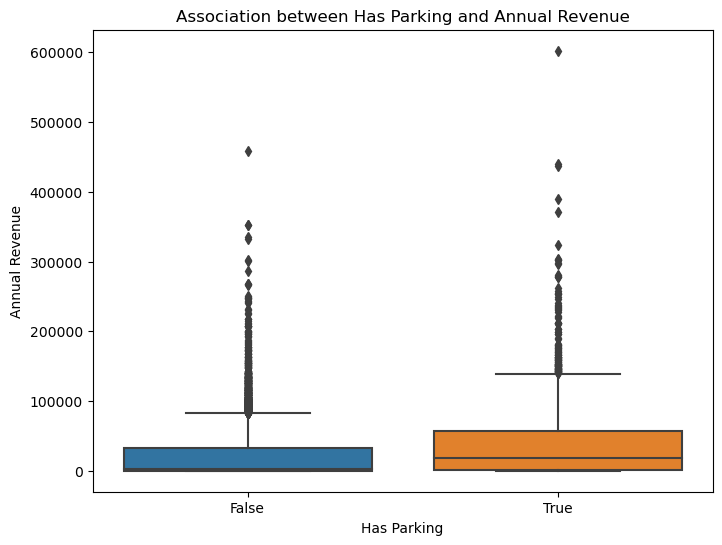

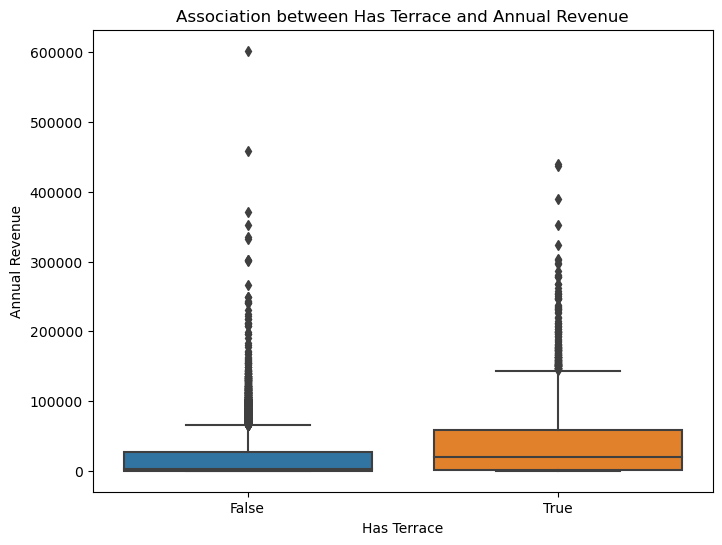

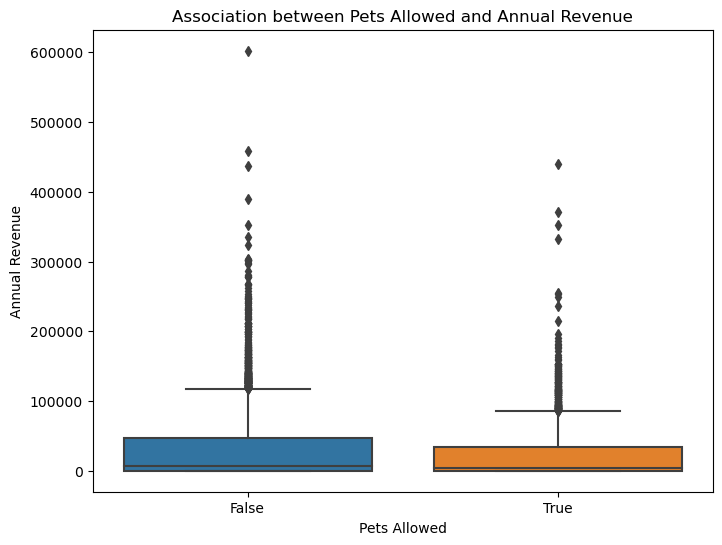

In [39]:
# Association between amenities and annual revenue

amenities = ['Has Pool', 'Has Air Conditioning', 'Has Parking', 'Has Terrace', 'Pets Allowed']

for amenity in amenities:
    # Generate boxplot to visualize the association between each amenity and annual revenue
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=amenity, y='Annual Revenue', data=df)
    plt.title(f'Association between {amenity} and Annual Revenue')
    plt.xlabel(amenity)
    plt.ylabel('Annual Revenue')
    plt.show()


In [40]:
# Combinations of property characteristics and amenities
# You can use groupby to analyze the mean annual revenue for different combinations of property characteristics and amenities
combinations = df.groupby(['Bedrooms', 'Bathrooms', 'Airbnb Superhost', 'Minimum Stay', 
                           'Pets Allowed', 'Has Pool', 'Has Air Conditioning', 
                           'Has Parking', 'Has Terrace'])['Annual Revenue'].mean().reset_index()

# Sort combinations by mean annual revenue
sorted_combinations = combinations.sort_values(by='Annual Revenue', ascending=False)

print("Top combinations of property characteristics and amenities generating higher revenue:")
print(sorted_combinations.head())

Top combinations of property characteristics and amenities generating higher revenue:
      Bedrooms  Bathrooms  Airbnb Superhost  Minimum Stay  Pets Allowed  \
2590         9        6.0             False           3.0         False   
2542         6        6.0             False           2.0          True   
2578         8        7.5              True           1.0         False   
2584         9        5.5             False           1.0         False   
2313         4        4.0             False           1.0          True   

      Has Pool  Has Air Conditioning  Has Parking  Has Terrace  Annual Revenue  
2590     False                  True         True        False        602386.0  
2542     False                  True         True         True        440439.0  
2578      True                  True         True         True        413635.5  
2584     False                  True        False        False        352116.0  
2313     False                  True        False        F

In [46]:
# Group the data by neighborhood and combinations of property characteristics and amenities
neighborhood_combinations = df.groupby(['Neighborhood', 'Bedrooms', 'Bathrooms', 'Airbnb Superhost', 
                                        'Minimum Stay', 'Pets Allowed', 'Has Pool', 
                                        'Has Air Conditioning', 'Has Parking', 'Has Terrace'])['Annual Revenue'].mean().reset_index()

# Sort combinations within each neighborhood by mean annual revenue
sorted_neighborhood_combinations = neighborhood_combinations.sort_values(by=['Neighborhood', 'Annual Revenue'], ascending=[True, False])

# Get the best combination for each neighborhood
best_combinations_by_neighborhood = sorted_neighborhood_combinations.groupby('Neighborhood').first().reset_index()

# Convert the output to a DataFrame
best_combinations_df = pd.DataFrame(best_combinations_by_neighborhood)

best_combinations_df


,Neighborhood,Bedrooms,Bathrooms,Airbnb Superhost,Minimum Stay,Pets Allowed,Has Pool,Has Air Conditioning,Has Parking,Has Terrace,Annual Revenue
0,Can Baró,3,2.0,True,3.0,False,False,True,True,True,69691.0
1,Canyelles,3,1.0,True,2.0,False,False,True,False,False,17225.0
2,Diagonal Mar i el Front Marítim del Poblenou,4,3.0,False,1.0,True,False,True,False,True,185944.0
3,Horta,3,1.5,False,1.0,False,False,True,True,True,51583.0
4,Hostafrancs,4,2.0,False,2.0,False,False,True,False,False,154648.0
...,...,...,...,...,...,...,...,...,...,...,...
63,la Vila Olímpica del Poblenou,2,2.0,False,3.0,False,False,True,True,True,246995.0
64,la Vila de Gràcia,4,3.0,True,1.0,False,False,True,True,True,233132.0
65,les Corts,4,3.0,False,3.0,False,True,True,True,True,140985.0
66,les Roquetes,1,1.0,True,6.0,False,False,True,True,True,28546.0


In [55]:
best_combinations_df.to_csv("best combinations.csv", index=False)

In [51]:
# Group the data by neighborhood and season
neighborhood_seasonal_data = df.groupby(['Neighborhood', 'Seasonality'])[['Occupancy Rate', 'Annual Revenue']].mean().reset_index()

# Find the period with the highest seasonality for each neighborhood
highest_seasonality_periods = neighborhood_seasonal_data.loc[neighborhood_seasonal_data.groupby('Neighborhood')['Seasonality'].idxmax()]

# Display the periods with the highest seasonality for each neighborhood
print("Periods with the highest seasonality for each neighborhood:")
print(highest_seasonality_periods)

Periods with the highest seasonality for each neighborhood:
                                    Neighborhood  Seasonality  Occupancy Rate  \
0                                       Can Baró         0.53        0.442561   
1                                      Canyelles         0.12        0.631667   
2   Diagonal Mar i el Front Marítim del Poblenou         0.46        0.527206   
3                                          Horta         0.03        0.305063   
4                                    Hostafrancs         0.81        0.596039   
..                                           ...          ...             ...   
63                 la Vila Olímpica del Poblenou         0.59        0.519716   
64                             la Vila de Gràcia         0.64        0.594516   
65                                     les Corts         0.53        0.549189   
66                                  les Roquetes         0.32        0.452444   
67                               les Tres Torres 